<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/Notebook_6_Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
# To show all columns' names on a large pandas dataframe
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'


od.download(dataset_url)

data_dir = './craigslist-carstrucks-data'

Skipping, found downloaded files in "./craigslist-carstrucks-data" (use force=True to force download)


In [218]:
df = pd.read_csv(data_dir+"/vehicles.csv")

In [219]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [220]:
df.drop(['id', 'url','region', 'region_url',  'VIN', 'image_url', 'description', 'county', 'state', 'lat', 'long','posting_date'], axis =1 , inplace=True)

In [221]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver


In [222]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

In [223]:
lower_lim_year = df['year'].quantile(0.25)-(IQR*1.5)
upper_lim_year = df['year'].quantile(0.75)+(IQR*1.5)
print(lower_lim_year), print(upper_lim_year)

1994.5
2030.5


(None, None)

In [224]:
# Removing Outliers in year c

df = df[(df['year'] >= lower_lim_year) & (df['year'] <= upper_lim_year)]

In [225]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver


In [226]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,price,year,odometer
count,409779.000,409779.000,405487.000
mean,68467.508,2012.636,95939.186
std,12037220.314,5.465,160097.929
min,0.000,1995.000,0.000
25%,5975.000,2009.000,38123.000
50%,13995.000,2014.000,86190.000
75%,26590.000,2017.000,134000.000
max,3736928711.000,2022.000,10000000.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


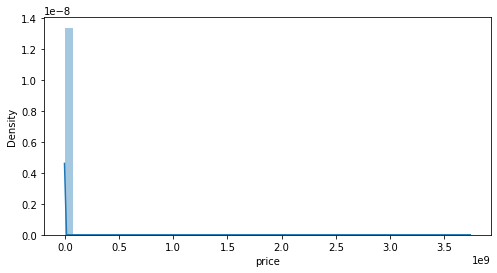

In [227]:
import seaborn as sns

sns.distplot(df['price'].dropna())

In [228]:
df = df[df['price'] < 100000]

In [229]:
df[df['price'] < 100 ]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
46,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,full-size,SUV,NaN
96,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN
126,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white
127,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white
128,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN
426812,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,fwd,NaN,NaN,silver
426832,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,fwd,NaN,NaN,blue
426836,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,4wd,full-size,truck,white


In [230]:
lower_lim_year = df['price'].quantile(0.25)-(IQR*1.5)
upper_lim_year = df['price'].quantile(0.75)+(IQR*1.5)
print(lower_lim_year), print(upper_lim_year)

5936.5
26603.5


(None, None)

In [231]:
df = df[df['price'] > 750]

In [232]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black


In [233]:
len(df.model.unique())

23802

In [234]:
df.shape

(365130, 14)

In [235]:
df = df[df['odometer'] > 10]

In [236]:
df = df[df['odometer'] < 300000 ]

In [237]:
Null_Values = df.isna().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Feature_name': df.columns,
                                 'Null_Values' : Null_Values,
                                 'percent_missing': percent_missing})

In [238]:
df = df[df['year'] > 1985]

In [239]:
Null_Values = df.isna().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Feature_name': df.columns,
                                 'Null_Values' : Null_Values,
                                 'percent_missing': percent_missing})
missing_value_df


,Feature_name,Null_Values,percent_missing
price,price,0,0.000000
year,year,0,0.000000
manufacturer,manufacturer,10529,2.941448
model,model,3127,0.873578
condition,condition,135367,37.816976
cylinders,cylinders,147236,41.132774
fuel,fuel,2059,0.575215
odometer,odometer,0,0.000000
title_status,title_status,5834,1.629823
transmission,transmission,1437,0.401449


In [246]:
null_col = ['manufacturer', 'model', 'condition', 'cylinders','fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size','type', 'paint_color']

for i in null_col:
  df[i] = df[i].fillna(method = 'ffill')
  

df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])


In [247]:
Null_Values = df.isna().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Feature_name': df.columns,
                                 'Null_Values' : Null_Values,
                                 'percent_missing': percent_missing})
missing_value_df


,Feature_name,Null_Values,percent_missing
price,price,0,0.0
year,year,0,0.0
manufacturer,manufacturer,0,0.0
model,model,0,0.0
condition,condition,0,0.0
cylinders,cylinders,0,0.0
fuel,fuel,0,0.0
odometer,odometer,0,0.0
title_status,title_status,0,0.0
transmission,transmission,0,0.0


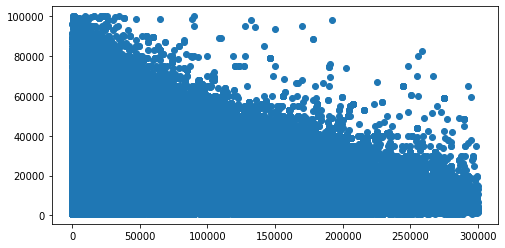

In [248]:
plt.scatter(df['odometer'],df['price'])

In [251]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer', 'model', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']] = df[['manufacturer', 'model', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)


In [252]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,13,18753,2,6,2,57923.0,0,2,0,0,8,10
28,22590,2010.0,7,19085,2,6,2,71229.0,0,2,0,0,8,1
29,39590,2020.0,7,19129,2,6,2,19160.0,0,2,0,0,8,8
30,30990,2017.0,38,21644,2,6,2,41124.0,0,2,0,0,8,8
31,15000,2013.0,12,10634,0,5,2,128000.0,0,0,2,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,30,15012,2,5,2,32226.0,0,2,1,1,9,10
426876,30590,2020.0,40,18149,2,5,2,12029.0,0,2,1,1,9,8
426877,34990,2020.0,6,22827,2,5,0,4174.0,0,2,1,1,4,10
426878,28990,2018.0,22,9755,2,5,2,30112.0,0,2,1,1,9,9


In [253]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(286362, 13) (286362,)
(71591, 13) (71591,)


In [254]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [255]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [256]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

n_est = [10,20,30,40,50,60,70,80,90,100]
for i in n_est:
  regressor = RandomForestRegressor(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))


n_estimators: 10
Mean Absolute Error: 2463.38
Mean Squared Error: 24265212.65
Root Mean Squared Error: 4925.97
n_estimators: 20
Mean Absolute Error: 2388.31
Mean Squared Error: 23055670.64
Root Mean Squared Error: 4801.63
n_estimators: 30
Mean Absolute Error: 2366.67
Mean Squared Error: 22735709.32
Root Mean Squared Error: 4768.2
n_estimators: 40
Mean Absolute Error: 2347.56
Mean Squared Error: 22486904.48
Root Mean Squared Error: 4742.04
n_estimators: 50
Mean Absolute Error: 2337.02
Mean Squared Error: 22307891.75
Root Mean Squared Error: 4723.12
n_estimators: 60
Mean Absolute Error: 2329.55
Mean Squared Error: 22226202.98
Root Mean Squared Error: 4714.47
n_estimators: 70
Mean Absolute Error: 2324.14
Mean Squared Error: 22140396.29
Root Mean Squared Error: 4705.36
n_estimators: 80
Mean Absolute Error: 2319.64
Mean Squared Error: 22076562.3
Root Mean Squared Error: 4698.57
n_estimators: 90
Mean Absolute Error: 2315.67
Mean Squared Error: 22000476.54
Root Mean Squared Error: 4690.47
n_e

In [257]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2305.04
Mean Squared Error: 21861175.86
Root Mean Squared Error: 4675.59


In [258]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2301.68
Mean Squared Error: 21832815.61
Root Mean Squared Error: 4672.56


In [259]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [260]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

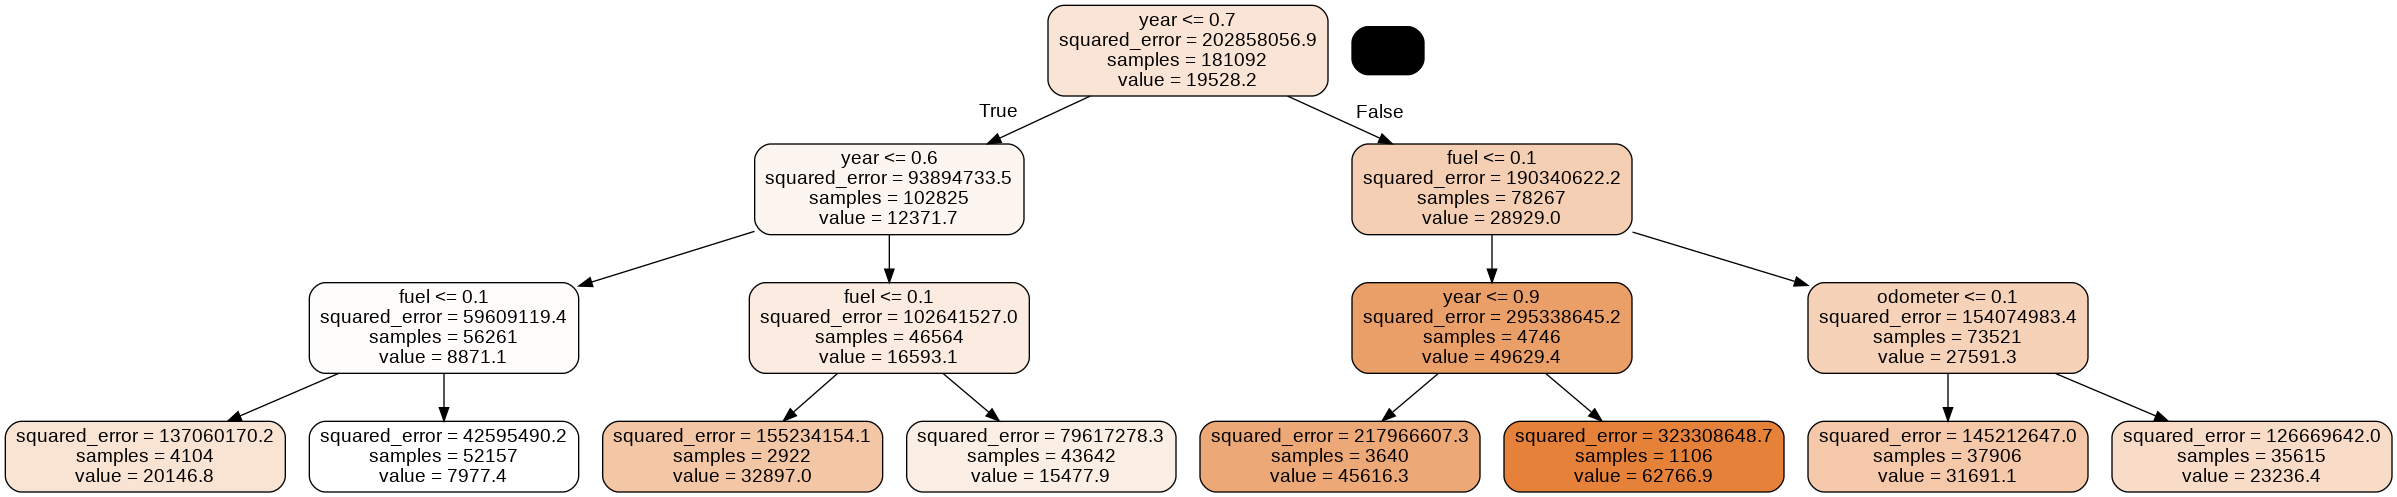

In [261]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

In [262]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.44
Variable: odometer             Importance: 0.12
Variable: model                Importance: 0.11
Variable: fuel                 Importance: 0.11
Variable: manufacturer         Importance: 0.05
Variable: cylinders            Importance: 0.04
Variable: type                 Importance: 0.03
Variable: transmission         Importance: 0.02
Variable: drive                Importance: 0.02
Variable: size                 Importance: 0.02
Variable: condition            Importance: 0.01
Variable: title_status         Importance: 0.01
Variable: paint_color          Importance: 0.01


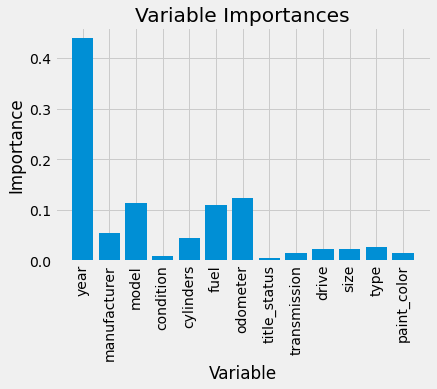

In [263]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

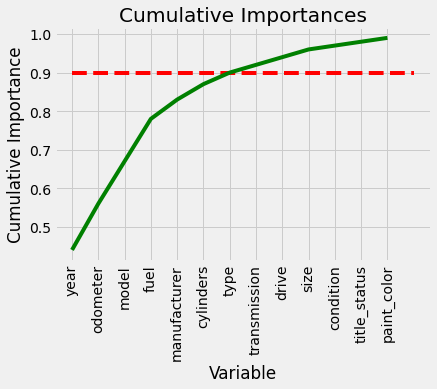

In [264]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [265]:
# Find number of features for cumulative importance of 90%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 7


In [266]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [268]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('drive'), 
                     feature_list.index('odometer'), feature_list.index('fuel'),
                     feature_list.index('model'), feature_list.index('cylinders'), feature_list.index('manufacturer')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [269]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [270]:
predictions = rf_most_important.predict(test_important)

In [271]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 2167.82
Mean Squared Error: 21026206.95
Root Mean Squared Error: 4585.43


In [ ]:
round(metrics.r2_score(y_test, predictions),2))